#### Assignment 

1. write digit 0-9 on paper 
2. take picture/photo of each digit 
3. load each digit as (20,20) in gray 
    - must convert to 20 by 20 pixel
4. using the k = 4 with the highest accuracy 
5. test your images and compare the predictions

In [41]:
# Combine 20x20 pixel image

import cv2 as cv

# First row
img0 = cv.imread('assets/00.png')
img1 = cv.imread('assets/11.png')
img2 = cv.imread('assets/22.png')
img3 = cv.imread('assets/33.png')
img4 = cv.imread('assets/44.png')

v_img = cv.hconcat([img0,img1,img2,img3,img4])
cv.imwrite('outp1l.png', v_img)

# Second row
img5 = cv.imread('assets/55.png')
img6 = cv.imread('assets/66.png')
img7 = cv.imread('assets/77.png')
img8 = cv.imread('assets/88.png')
img9 = cv.imread('assets/99.png')

v_img = cv.hconcat([img5,img6,img7,img8,img9])
cv.imwrite('outp2l.png', v_img)

# Combine to one image 
img_r1 = cv.imread('/Users/azureennaja/Desktop/Perantis/cv-master/essential/outp1l.png')
img_r2 = cv.imread('/Users/azureennaja/Desktop/Perantis/cv-master/essential/outp2l.png')
h_img = cv.vconcat([img_r1, img_r2])
cv.imwrite('final2.png', h_img)

True

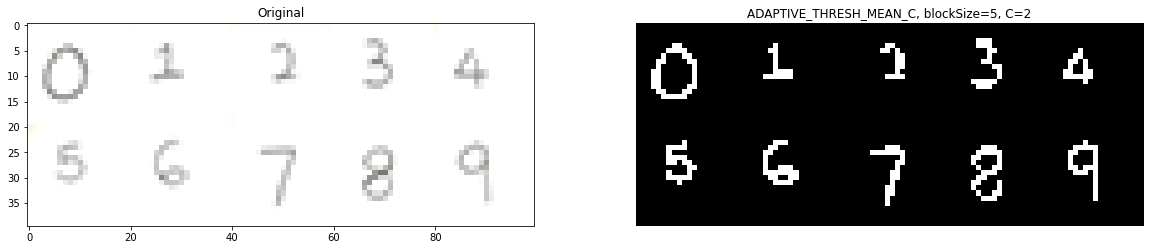

True

In [47]:
# Convert background using thresholding

import cv2 as cv 
import matplotlib.pyplot as plt 

# file path
imgPath = 'final2.png'
img = cv.imread(imgPath)

# Convert to grayscale 
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

imgGrayF = cv.bilateralFilter(imgGray,  5, 25, 25)

maxval = 255
blockSize = 5
C = 2
thresh_img = cv.adaptiveThreshold(imgGrayF, maxval, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, blockSize=blockSize, C=C)

# gray to RGB
thresh_img = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)


plt.figure(figsize=(20,20))
imgRGB = img[:,:,::-1]
plt.subplot(221)
plt.title("Original")
plt.imshow(imgRGB)


plt.subplot(222)
plt.imshow(thresh_img)
plt.title(f'ADAPTIVE_THRESH_MEAN_C, blockSize={blockSize}, C={C}')
plt.axis('off')

plt.show()

cv.imwrite('final_2.png', thresh_img)


In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '../samples/data/digits.png'
imgGray = cv.imread(filename, cv.IMREAD_GRAYSCALE)

print(imgGray.shape)

#### get all the digits
IMG_SIZE = 20

# Resize
rowNum = imgGray.shape[0] / IMG_SIZE
colNum = imgGray.shape[1] / IMG_SIZE

rows = np.vsplit(imgGray, rowNum)  #split each row first

digits = []
for row in rows:
    rowCells = np.hsplit(row, colNum)  #after splitting row, split each col 
    for digit in rowCells:
        digits.append(digit)   #each cell rep a particular digit

# convert list to np.array
digits = np.array(digits)
print('digits', digits.shape)

# labels
DIGITS_CLASS = 10
repeatNum = len(digits) / DIGITS_CLASS
labels = np.repeat(np.arange(DIGITS_CLASS), repeatNum)
print('labels', labels.shape)

#### get features
features = []
for digit in digits:
    img_pixel = np.float32(digit.flatten())  #flatten 20 by 20 pixel to 1D array of 400 pixel
    features.append(img_pixel)

features = np.squeeze(features)
print('features', features.shape)

# shuffle features and labels
# seed random for constant random value
rand = np.random.RandomState(321)
shuffle = rand.permutation(features.shape[0])
features, labels = features[shuffle], labels[shuffle]

# split into training and testing 
splitRatio = [2, 1]
sumRatio = sum(splitRatio)
partition = np.array(splitRatio) * len(features) // sumRatio
partition = np.cumsum(partition)

featureTrain, featureTest = np.array_split(features, partition[:-1])
labelTrain, labelTest = np.array_split(labels, partition[:-1])

print('featureTrain', featureTrain.shape)
print('featureTest', featureTest.shape)
print('labelTrain', labelTrain.shape)
print('labelTest', labelTest.shape)

# Train the KNN model:
print('Training KNN model')
knn = cv.ml.KNearest_create()
knn.train(featureTrain, cv.ml.ROW_SAMPLE, labelTrain)

# Test the created model:
k = 4
ret, prediction, neighbours, dist = knn.findNearest(featureTest, k)

# Compute the accuracy:
accuracy = (np.squeeze(prediction) == labelTest).mean() * 100
print("Accuracy when k=4: {}".format(accuracy))
print()

#### Test own handwriting:


def test_handwriting(filename):
    
    imgGray = cv.imread(filename, cv.IMREAD_GRAYSCALE)

    print("Image shape:", imgGray.shape)

    IMG_SIZE = 20

    # Resize
    rowNum = imgGray.shape[0] / IMG_SIZE
    colNum = imgGray.shape[1] / IMG_SIZE

    rows = np.vsplit(imgGray, rowNum)  #split each row first

    digits = []
    for row in rows:
        rowCells = np.hsplit(row, colNum)  #after splitting row, split each col 
        for digit in rowCells:
            digits.append(digit)   #each cell rep a particular digit

    # convert list to np.array
    digits = np.array(digits)
    print('digits', digits.shape)

    # labels
    DIGITS_CLASS = 10
    repeatNum = len(digits) / DIGITS_CLASS
    labels = np.repeat(np.arange(DIGITS_CLASS), repeatNum)
    print('labels', labels.shape)

    own_features = []
    for digit in digits:
        img_pixel = np.float32(digit.flatten())  
        own_features.append(img_pixel)

    own_features = np.squeeze(own_features)
    print('features', own_features.shape)

    ret, prediction, neighbours, dist = knn.findNearest(own_features, k)

    # Compute the accuracy:
    accuracy = (np.squeeze(prediction) == labels).mean() * 100
    
    print("Accuracy of own handwriting: {}".format(accuracy))
    print()
    

test_handwriting('final_2.png')



(1000, 2000)
digits (5000, 20, 20)
labels (5000,)
features (5000, 400)
featureTrain (3333, 400)
featureTest (1667, 400)
labelTrain (3333,)
labelTest (1667,)
Training KNN model
Accuracy when k=4: 93.94121175764847

Image shape: (40, 100)
digits (10, 20, 20)
labels (10,)
features (10, 400)
Accuracy of own handwriting: 30.0

